# <center>**L layered Deep Neural Network for Multi-class Classification**</center>

# Packages

In [1]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

# Dataset

In [2]:
## Read Data from .txt files and convert into 2D Array.

def read_data(path_txt):
    df = open(path_txt, "r")
    lines = df.readlines()
    df.close()

    dataset=[]
    for index, line in enumerate(lines):
        dataset.append([])
        temp=line.strip("\n").split(" ")
        num_lst=[]
        for i in range(len(temp[1])):
            num_lst.append(eval(temp[1][i]))
        dataset[index].append(num_lst)
        # dataset[index].append([dic[temp[0]]])
        dataset[index].append(temp[0])

    return dataset 

In [3]:
## Train and Test Array

train=read_data("NNtrain.dat.txt")
test=read_data("NNtest.dat.txt")

## Converting Array into DataFrame

train_df=pd.DataFrame(np.array(train))
test_df=pd.DataFrame(np.array(test))

## Seperating every Bit into column.

cols=["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10","c11","c12","c13","c14","c15","c16","c17","c18","c19","c20","c21","c22","c23","c24","c25","c26","c27","c28","c29","c30","c31","c32","c33","c34","c35"]

train_df=train_df[[1]].join(pd.DataFrame(train_df[0].values.tolist(),columns=cols,index=train_df.index))
test_df=test_df[[1]].join(pd.DataFrame(test_df[0].values.tolist(),columns=cols,index=test_df.index))

print(train_df.shape)
print(test_df.shape)


(288, 36)
(288, 36)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


In [4]:
### Features and target Variable

x_train=train_df.drop([1],axis=1)
y_train=train_df[1]
x_test=test_df.drop([1],axis=1)
y_test=test_df[1]

In [5]:
### Converting y_train into DataFrame suitable for sklearn

e_train=pd.DataFrame(y_train)
e_test=pd.DataFrame(y_test)

## ONE-HOT ENCODING

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder()
e_train=encoder.fit_transform(e_train)
target_train=e_train.toarray()

encoder = OneHotEncoder()
e_test=encoder.fit_transform(e_test)
target_test=e_train.toarray()


In [6]:
target_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [7]:
Tx_train=x_train.T
Ty_train=target_train.T
Tx_test=x_test.T
Ty_test=target_test.T

print("Updated shape of Train features : ",Tx_train.shape)
print("Updated shape of Train targets : ",Ty_train.shape)
print("Updated shape of Test features : ",Tx_test.shape)
print("Updated shape of Test targets : ",Ty_test.shape)

Updated shape of Train features :  (35, 288)
Updated shape of Train targets :  (36, 288)
Updated shape of Test features :  (35, 288)
Updated shape of Test targets :  (36, 288)


In [8]:
print(type(Tx_train))
print(type(Ty_train))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [9]:
### Function Convert the numpy array of numbers into corresponding label.
def numTolabel(array):
  lst=[]
  dic={35:"A",34:"B",33:"C",32:"D",31:"E",30:"F",29:"G",28:"H",27:"I",26:"J",25:"K",24:"L",23:"M",22:"N",21:"O",20:"P",19:"Q",18:"R",17:"S",16:"T",15:"U",14:"V",13:"W",12:"X",11:"Y",10:"Z",9:"1",8:"2",7:"3",6:"4",5:"5",4:"6",3:"7",2:"8",1:"9",0:"0"}
  for i in range(len(array)):
    lst.append(dic[array[i]])
  return np.array(lst)


# Activation Functions

In [10]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A

def softmax(z):
    expZ = np.exp(z)
    return expZ/(np.sum(expZ, 0))

def relu(Z):
    A = np.maximum(0,Z)
    return A

def tanh(x):
    return np.tanh(x)

def derivative_relu(Z):
    return np.array(Z > 0, dtype = 'float')

def derivative_tanh(x):
    return (1 - np.power(x, 2))

# Initialize Parameters

- We need to initialize the **W** parameters randomly, and **B** with zeros
- And as our Deep Neural network has **L layers**, we will repeat it for **L-1 times**, from $W_1 to W_L$

In [11]:
def initialize_parameters(layer_dims):
    
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [12]:
layer_dims = [Tx_train.shape[0], 100, 200, Ty_train.shape[0]]
params = initialize_parameters(layer_dims)

for l in range(1, len(layer_dims)):
    print("Shape of W" + str(l) + ":", params['W' + str(l)].shape)
    print("Shape of B" + str(l) + ":", params['b' + str(l)].shape, "\n")

Shape of W1: (100, 35)
Shape of B1: (100, 1) 

Shape of W2: (200, 100)
Shape of B2: (200, 1) 

Shape of W3: (36, 200)
Shape of B3: (36, 1) 



# Forward Propagation

- sigmoid activation function will be used only at the last layer (output layer), while we will use relu/tanh for other layers



For f(x), you can use either tanh or ReLU activation function. But also use the derivative of the same for Backpropagation as well

In [13]:
def forward_propagation(X, parameters, activation):
   
    forward_cache = {}
    L = len(parameters) // 2                  
    
    forward_cache['A0'] = X

    for l in range(1, L):
        forward_cache['Z' + str(l)] = parameters['W' + str(l)].dot(forward_cache['A' + str(l-1)]) + parameters['b' + str(l)]
        
        if activation == 'tanh':
            forward_cache['A' + str(l)] = tanh(forward_cache['Z' + str(l)])
        else:
            forward_cache['A' + str(l)] = relu(forward_cache['Z' + str(l)])
            

    forward_cache['Z' + str(L)] = parameters['W' + str(L)].dot(forward_cache['A' + str(L-1)]) + parameters['b' + str(L)]
    
    if forward_cache['Z' + str(L)].shape[0] == 1:
        forward_cache['A' + str(L)] = sigmoid(forward_cache['Z' + str(L)])
    else :
        forward_cache['A' + str(L)] = softmax(forward_cache['Z' + str(L)])
    
    return forward_cache['A' + str(L)], forward_cache

In [14]:
aL, forw_cache = forward_propagation(Tx_train, params, 'relu')

for l in range(len(params)//2 + 1):
    print("Shape of A" + str(l) + " :", forw_cache['A' + str(l)].shape)

Shape of A0 : (35, 288)
Shape of A1 : (100, 288)
Shape of A2 : (200, 288)
Shape of A3 : (36, 288)


# Cost Function

#### For multi-class classification:

 $$ E(t) =\frac{1}{NM} \sum_{p=1}^N \sum_{k=1}^M (Y -O)^2$$ 

In [15]:
def compute_cost(AL, Y):
    n = Y.shape[0]
    m = Y.shape[1]
    
    if Y.shape[0] == 1: ## For Binary classification          
        cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    else: ##For Multi-class classification 
        cost = (1/(n*m))*np.sum(np.square(Y-AL))
        
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    
    return cost

# Backward Propagation

- For last layer, **$dZ_L$** will be $A_L - Y$
- Except for last layer, we use a loop to implement backprop for other layers


In [16]:
def backward_propagation(AL, Y, parameters, forward_cache, activation):
    
    grads = {}
    L = len(parameters)//2
    m = AL.shape[1]
    
    grads["dZ" + str(L)] = AL - Y
    grads["dW" + str(L)] = 1./m * np.dot(grads["dZ" + str(L)],forward_cache['A' + str(L-1)].T)
    grads["db" + str(L)] = 1./m * np.sum(grads["dZ" + str(L)], axis = 1, keepdims = True)
    
    for l in reversed(range(1, L)):
        if activation == 'tanh':
            grads["dZ" + str(l)] = np.dot(parameters['W' + str(l+1)].T,grads["dZ" + str(l+1)])*derivative_tanh(forward_cache['A' + str(l)])
        else:
            grads["dZ" + str(l)] = np.dot(parameters['W' + str(l+1)].T,grads["dZ" + str(l+1)])*derivative_relu(forward_cache['A' + str(l)])
            
        grads["dW" + str(l)] = 1./m * np.dot(grads["dZ" + str(l)],forward_cache['A' + str(l-1)].T)
        grads["db" + str(l)] = 1./m * np.sum(grads["dZ" + str(l)], axis = 1, keepdims = True)

    return grads

In [17]:
grads = backward_propagation(forw_cache["A" + str(3)], Ty_train, params, forw_cache, 'relu')

for l in reversed(range(1, len(grads)//3 + 1)):
    print("Shape of dZ" + str(l) + " :", grads['dZ' + str(l)].shape)
    print("Shape of dW" + str(l) + " :", grads['dW' + str(l)].shape)
    print("Shape of dB" + str(l) + " :", grads['db' + str(l)].shape, "\n")

Shape of dZ3 : (36, 288)
Shape of dW3 : (36, 200)
Shape of dB3 : (36, 1) 

Shape of dZ2 : (200, 288)
Shape of dW2 : (200, 100)
Shape of dB2 : (200, 1) 

Shape of dZ1 : (100, 288)
Shape of dW1 : (100, 35)
Shape of dB1 : (100, 1) 



# Update Parameters

In [18]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2 
    
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

# Predictions

In [19]:
def predict(X, y, parameters, activation):

    m = X.shape[1]
    y_pred, caches = forward_propagation(X, parameters, activation)
    
    if y.shape[0] == 1:
        y_pred = np.array(y_pred > 0.5, dtype = 'float')
    else:
        y = np.argmax(y, 0)
        y_pred = np.argmax(y_pred, 0)
        
    
    return y_pred,np.round(np.sum((y_pred == y)/m), 2)

# Complete Model

Implement the entire Deep Neural Network here

### Instructions :

We need to initialize parameters once, and after that, we will run the following in a loop:
- forward_prop(x, parameters)
- cost_function(aL, y)
- backward_prop(x, y, parameters, forward_cache)
- parameters = update_parameters(parameters, gradients, learning_rate)

### Return :
- parameters, which will be our trained parameters

In [20]:
def model(X, Y, layers_dims, learning_rate = 0.03, activation = 'relu', num_iterations = 3000):#lr was 0.009

    np.random.seed(1)
    costs = []              
    
    parameters = initialize_parameters(layers_dims)

    for i in range(0, num_iterations):

        AL, forward_cache = forward_propagation(X, parameters, activation)

        cost = compute_cost(AL, Y)

        grads = backward_propagation(AL, Y, parameters, forward_cache, activation)

        parameters = update_parameters(parameters, grads, learning_rate)
        if i % (num_iterations/10) == 0:
          train_predict,train_accuary=predict(Tx_train, Ty_train, parameters, activation)
          test_predict,test_accuary=predict(Tx_test, Ty_test, parameters, activation)
          print("\niter:{} \t cost: {} \t train_acc:{} \t test_acc:{}".format(i, np.round(cost, 2),train_accuary,test_accuary ))
        
        if i % 10 == 0:
            print("==", end = '')

    ### TUPLE returning every parameters, train and test values. 
    return train_predict,test_predict,parameters 


# Confusion Matrix

In [35]:
def myConfusionmatrix(actual,predict,label="Tabel",color=sns.cubehelix_palette(as_cmap=True)):
  cm = confusion_matrix(actual,predict)
  cm_df = pd.DataFrame(cm)
  #Plotting the confusion matrix
  plt.figure(figsize=(40,40))
  sns.heatmap(cm_df, annot=True,cmap=color,annot_kws={"fontsize":8})
  plt.title('Confusion Matrix '+label, fontsize=70)
  plt.ylabel('Actal Values', fontsize=60)
  plt.xlabel('Predicted Values', fontsize=60)
  plt.show()

### RUN 1

In [22]:
layers_dims_1 = [Tx_train.shape[0], 20 ,Ty_train.shape[0]] #  1-Hidden Layer
lr_1 = 0.01
iters_1 = 2500

train_predict_1,test_predict_1,parameters_1 = model(Tx_train, Ty_train, layers_dims_1, learning_rate = lr_1, activation = 'relu', num_iterations = iters_1)


iter:0 	 cost: 0.03 	 train_acc:0.03 	 test_acc:0.02
iter:250 	 cost: 0.03 	 train_acc:0.12 	 test_acc:0.15
iter:500 	 cost: 0.03 	 train_acc:0.26 	 test_acc:0.25
iter:750 	 cost: 0.03 	 train_acc:0.4 	 test_acc:0.36
iter:1000 	 cost: 0.02 	 train_acc:0.44 	 test_acc:0.41
iter:1250 	 cost: 0.02 	 train_acc:0.62 	 test_acc:0.58
iter:1500 	 cost: 0.02 	 train_acc:0.73 	 test_acc:0.7
iter:1750 	 cost: 0.02 	 train_acc:0.83 	 test_acc:0.83
iter:2000 	 cost: 0.01 	 train_acc:0.9 	 test_acc:0.89
iter:2250 	 cost: 0.01 	 train_acc:0.93 	 test_acc:0.92

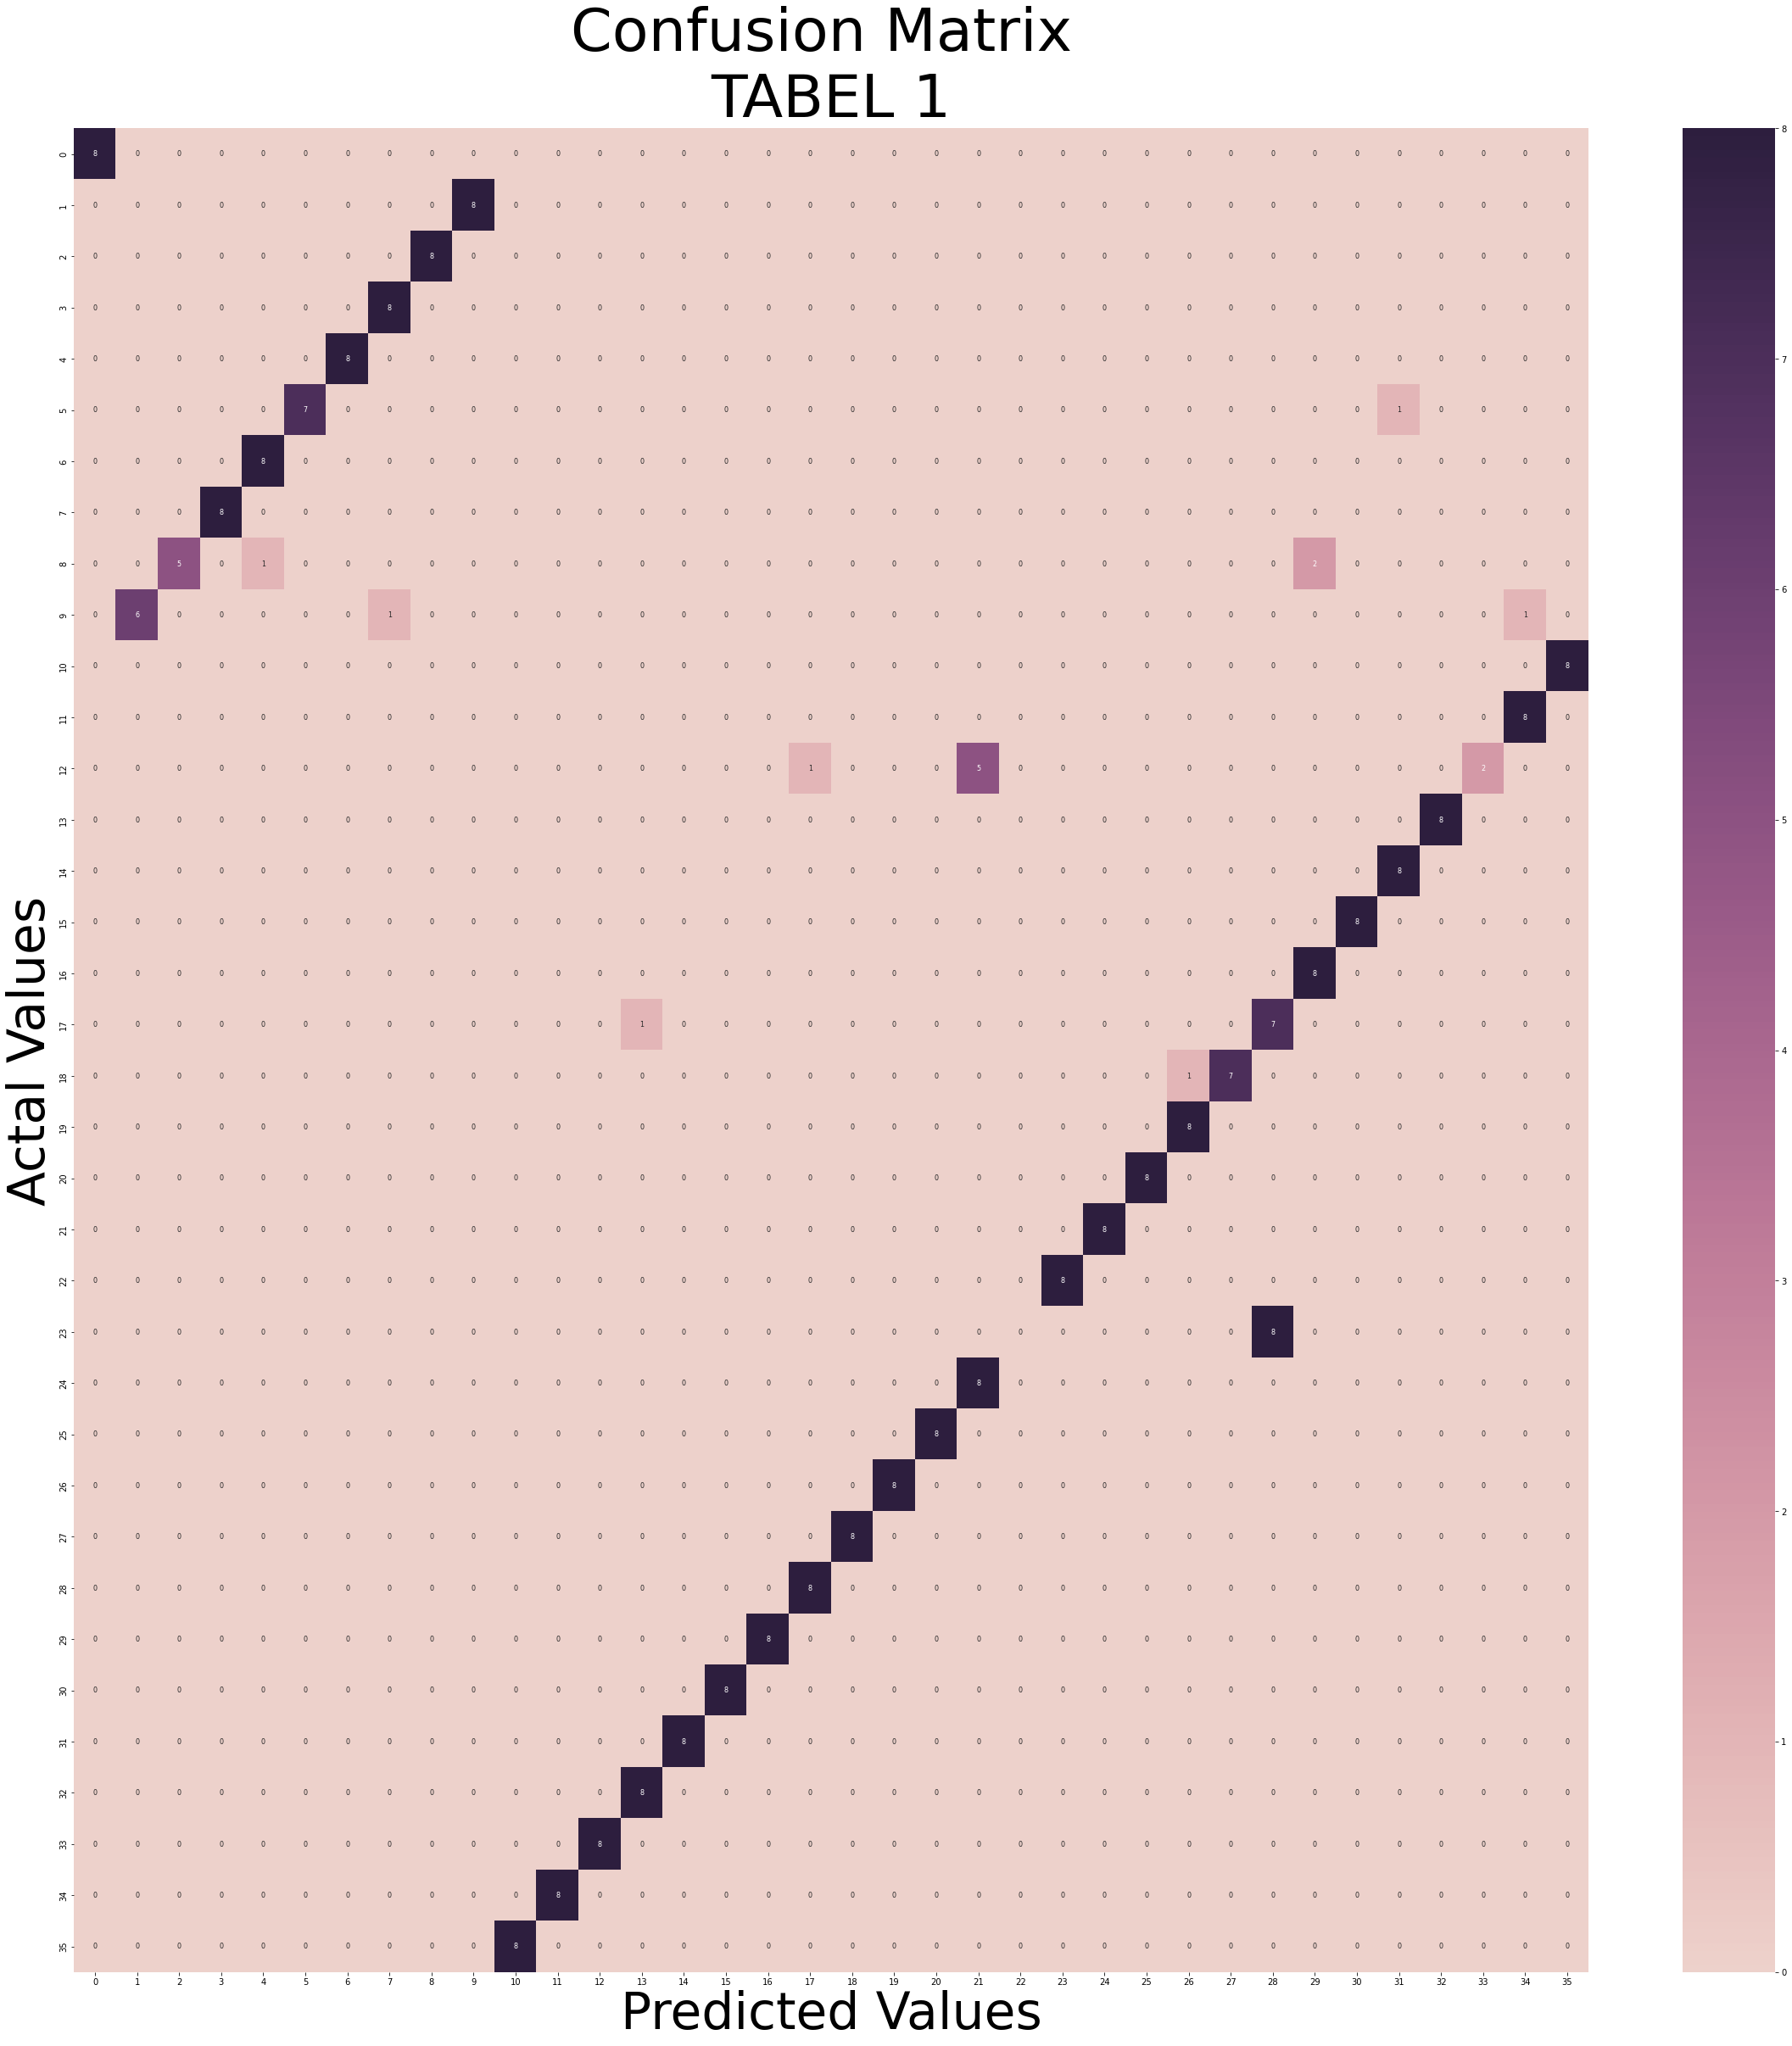

In [37]:
tp1=numTolabel(test_predict_1)
np_array=np.array(y_test)
myConfusionmatrix(np_array,tp1,"\nTABEL 1")

### RUN 2

In [24]:
layers_dims_2 = [Tx_train.shape[0],20, 10, Ty_train.shape[0]] #  2-hidden model
lr_2 = 0.01
iters_2 = 2500

train_predict_2,test_predict_2,parameters_2 = model(Tx_train, Ty_train, layers_dims_2, learning_rate = lr_2, activation = 'relu', num_iterations = iters_2)


iter:0 	 cost: 0.03 	 train_acc:0.03 	 test_acc:0.03
iter:250 	 cost: 0.03 	 train_acc:0.07 	 test_acc:0.07
iter:500 	 cost: 0.03 	 train_acc:0.13 	 test_acc:0.11
iter:750 	 cost: 0.03 	 train_acc:0.17 	 test_acc:0.17
iter:1000 	 cost: 0.03 	 train_acc:0.28 	 test_acc:0.26
iter:1250 	 cost: 0.02 	 train_acc:0.38 	 test_acc:0.38
iter:1500 	 cost: 0.02 	 train_acc:0.43 	 test_acc:0.42
iter:1750 	 cost: 0.02 	 train_acc:0.53 	 test_acc:0.54
iter:2000 	 cost: 0.02 	 train_acc:0.67 	 test_acc:0.66
iter:2250 	 cost: 0.01 	 train_acc:0.73 	 test_acc:0.72

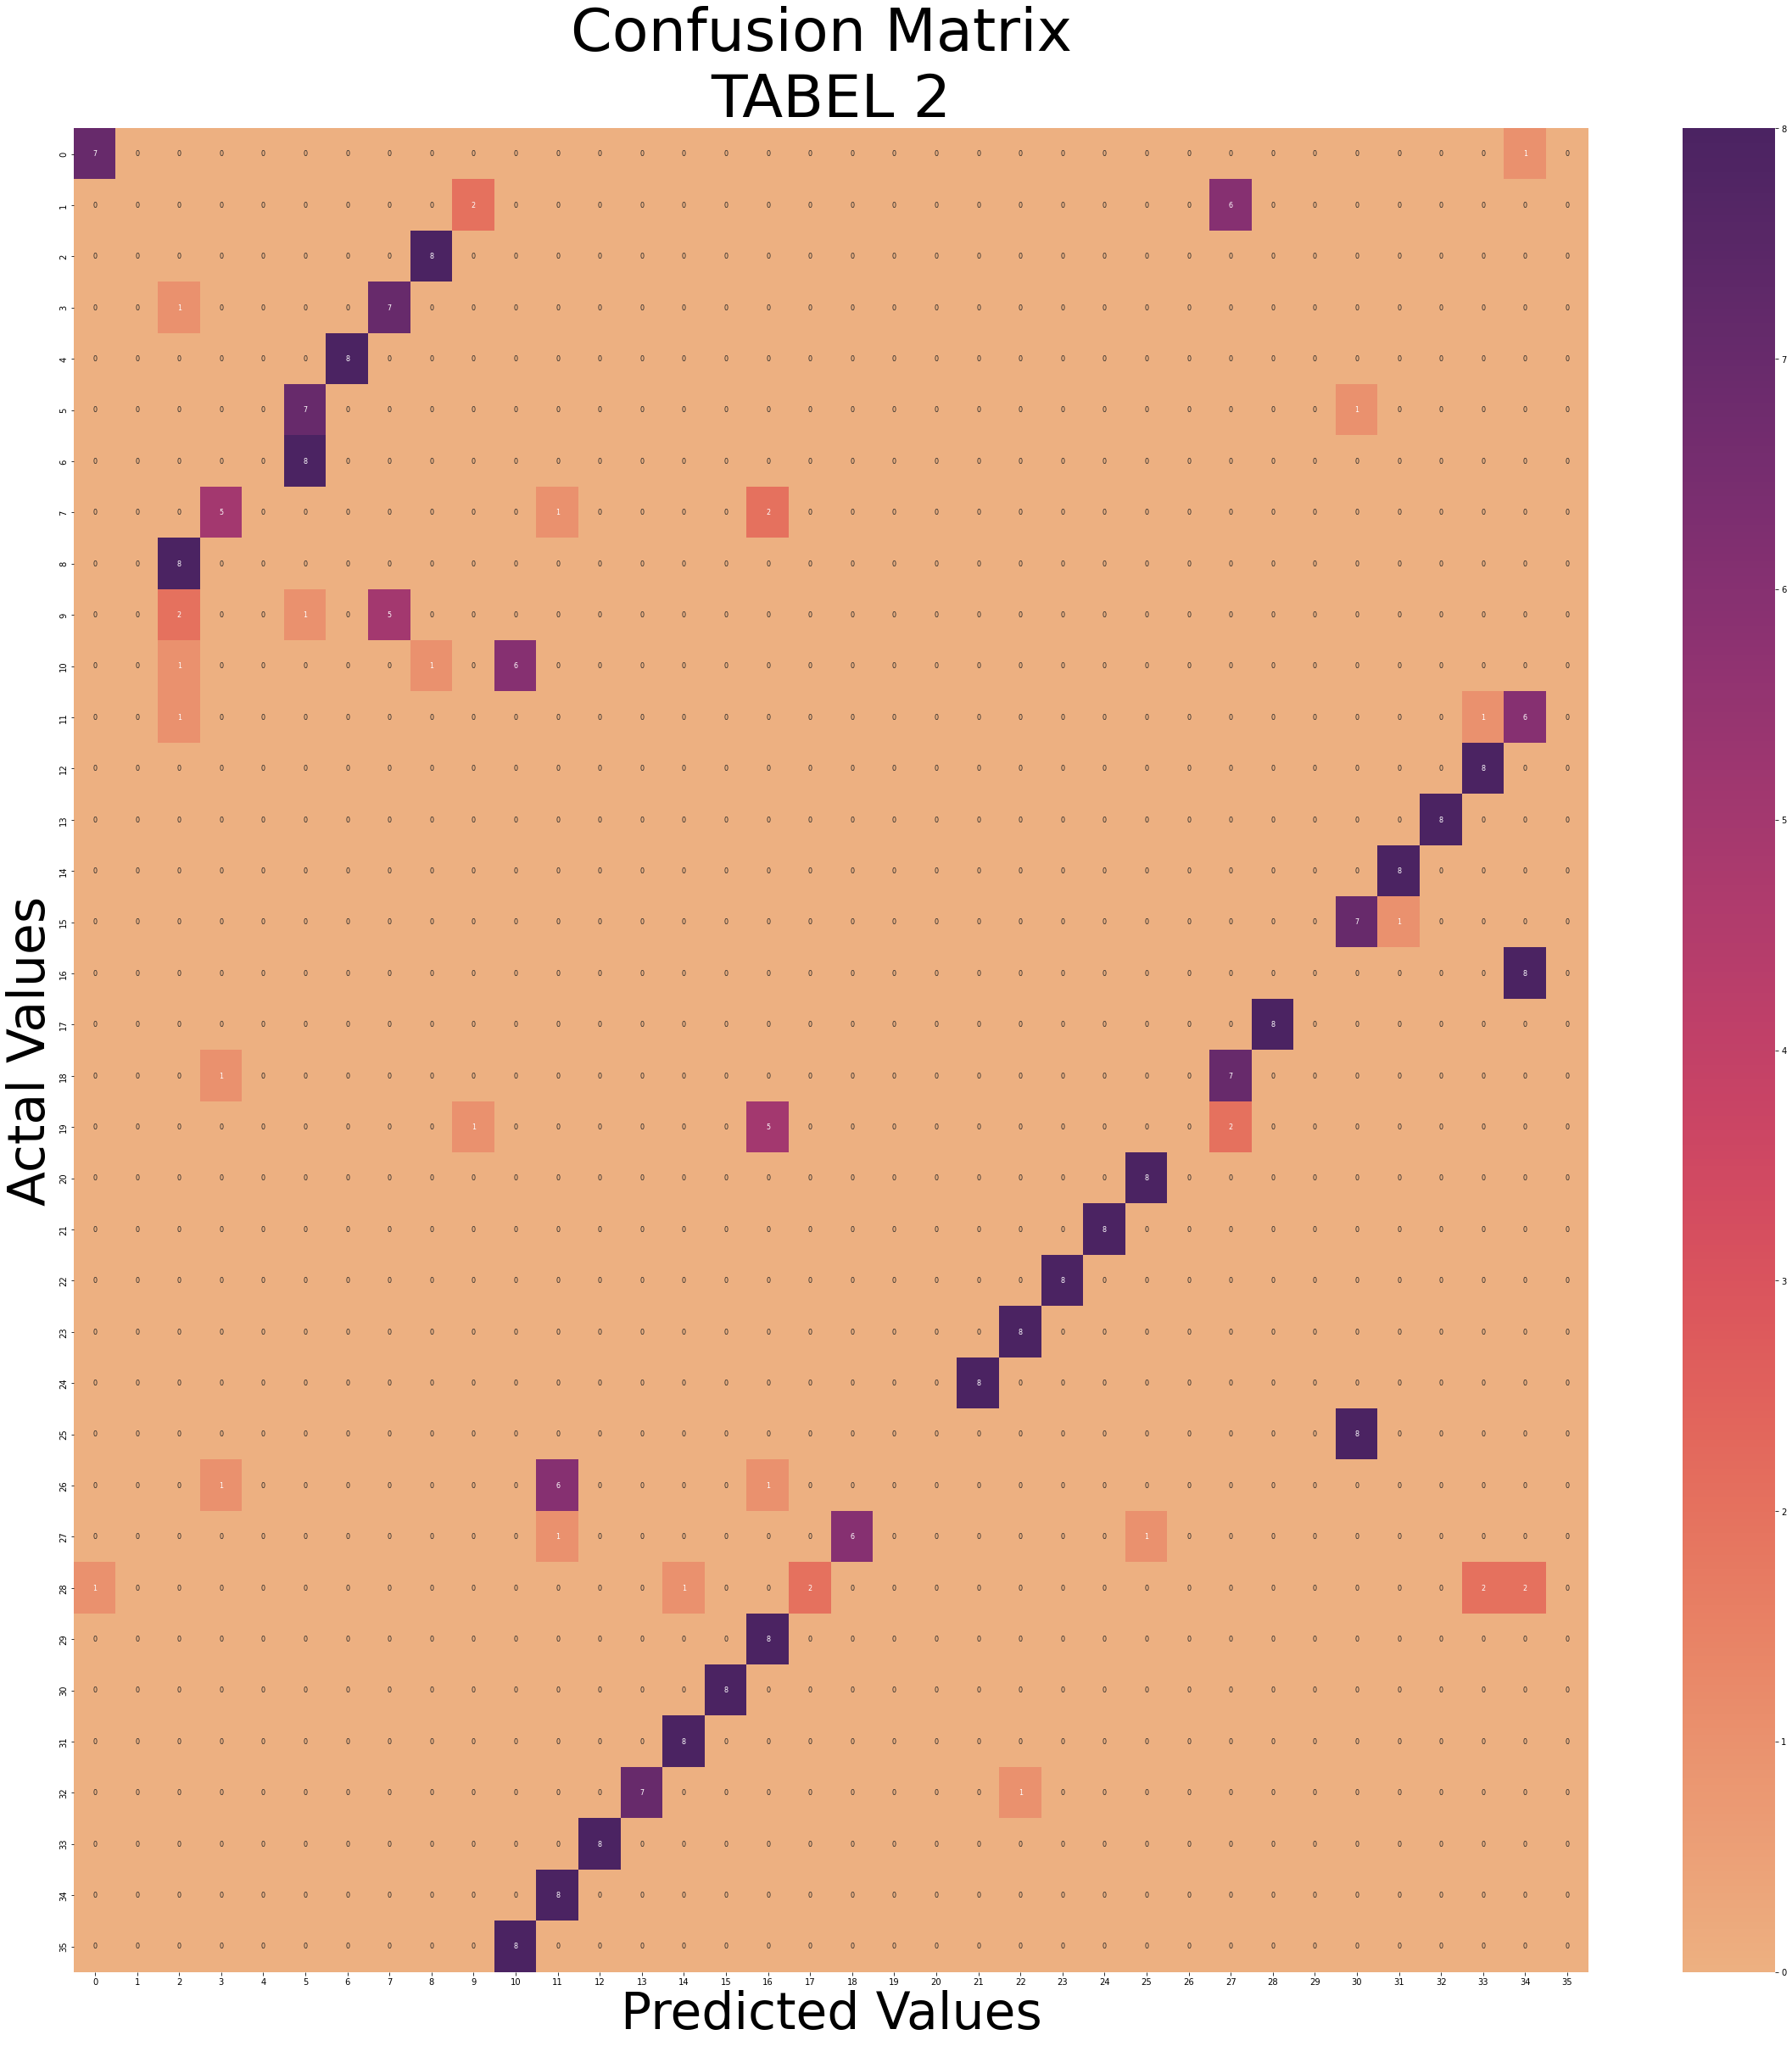

In [41]:
tp2=numTolabel(test_predict_2)
np_array=np.array(y_test)
myConfusionmatrix(np_array,tp2,"\nTABEL 2",color=sns.color_palette("flare", as_cmap=True))

### RUN 3

In [25]:
layers_dims_3 = [Tx_train.shape[0], 10,10, Ty_train.shape[0]] #  2-hidden model
lr_3 = 0.01
iters_3 = 2500

train_predict_3,test_predict_3,parameters_3 = model(Tx_train, Ty_train, layers_dims_3, learning_rate = lr_3, activation = 'relu', num_iterations = iters_3)


iter:0 	 cost: 0.03 	 train_acc:0.06 	 test_acc:0.06
iter:250 	 cost: 0.03 	 train_acc:0.08 	 test_acc:0.07
iter:500 	 cost: 0.03 	 train_acc:0.12 	 test_acc:0.11
iter:750 	 cost: 0.03 	 train_acc:0.16 	 test_acc:0.15
iter:1000 	 cost: 0.03 	 train_acc:0.21 	 test_acc:0.21
iter:1250 	 cost: 0.02 	 train_acc:0.27 	 test_acc:0.27
iter:1500 	 cost: 0.02 	 train_acc:0.38 	 test_acc:0.36
iter:1750 	 cost: 0.02 	 train_acc:0.64 	 test_acc:0.59
iter:2000 	 cost: 0.01 	 train_acc:0.8 	 test_acc:0.77
iter:2250 	 cost: 0.01 	 train_acc:0.91 	 test_acc:0.85

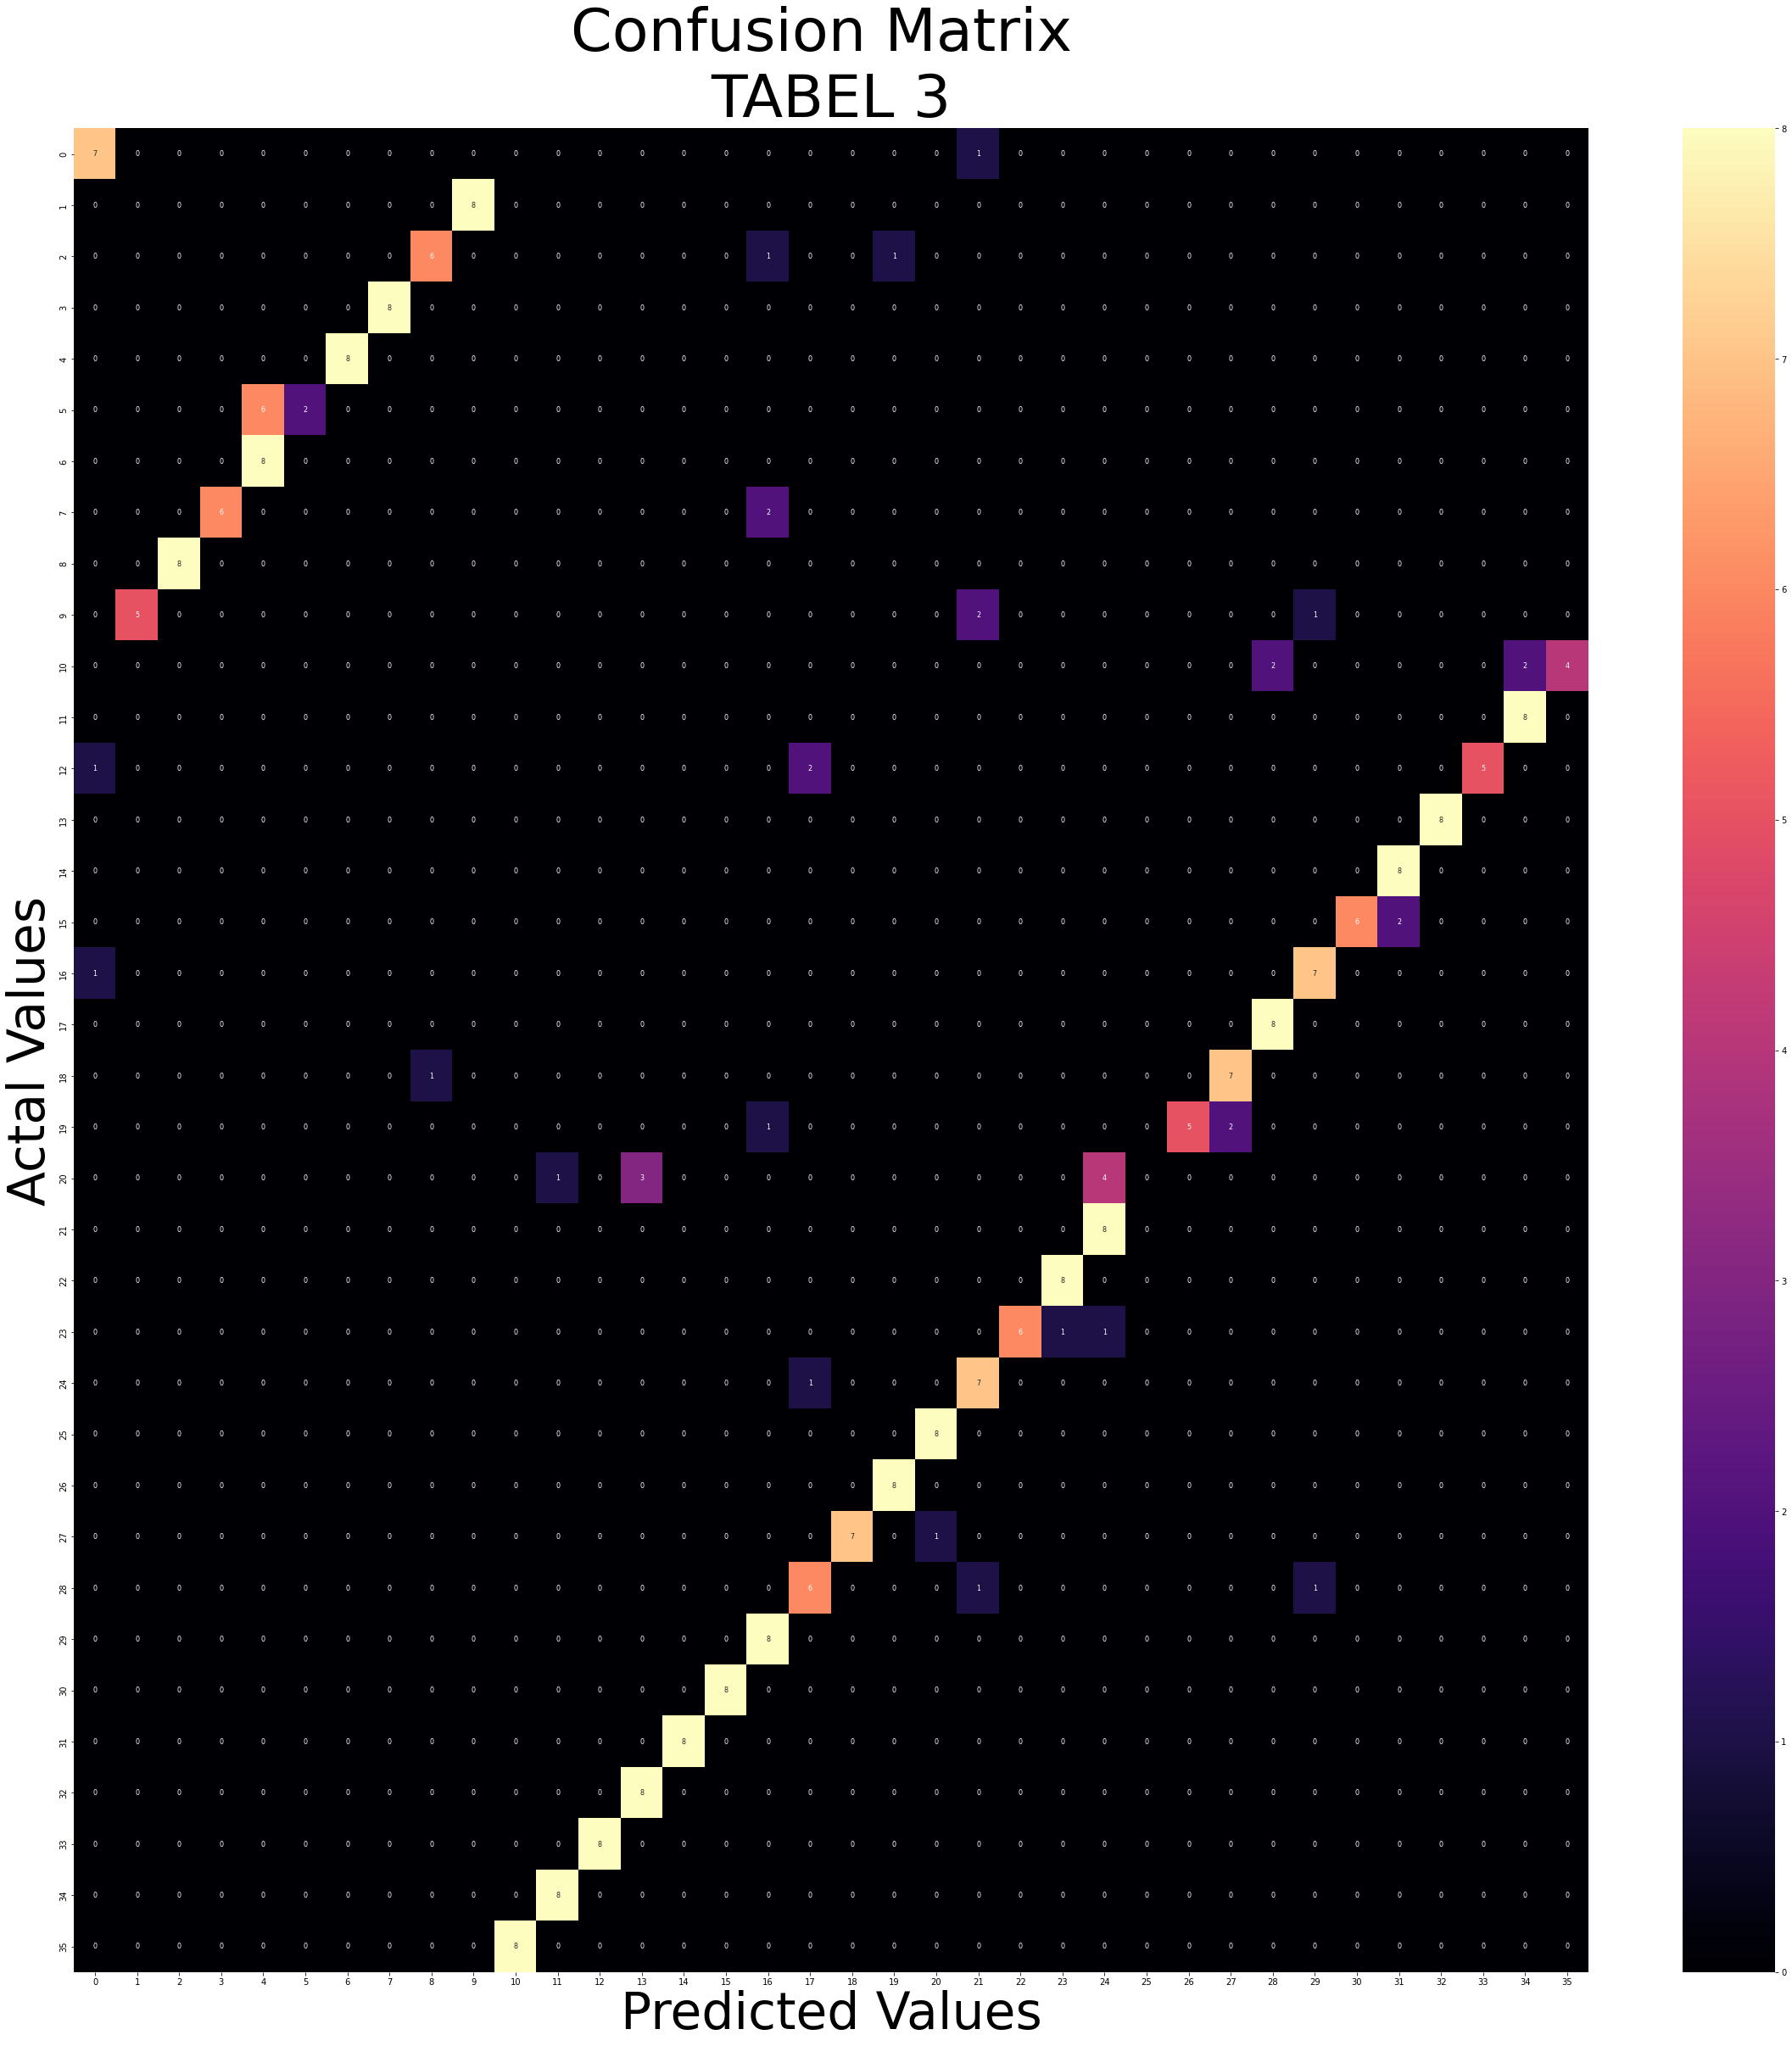

In [42]:
tp3=numTolabel(test_predict_3)
np_array=np.array(y_test)
myConfusionmatrix(np_array,tp3,"\nTABEL 3",color=sns.color_palette("magma", as_cmap=True))

### RUN 4

In [26]:
layers_dims_4 = [Tx_train.shape[0], 10,10, Ty_train.shape[0]] #  2-hidden model
lr_4 = 0.01
iters_4 = 2500

train_predict_4,test_predict_4,parameters_4 = model(Tx_train, Ty_train, layers_dims_4, learning_rate = lr_4, activation = 'relu', num_iterations = iters_4)


iter:0 	 cost: 0.03 	 train_acc:0.06 	 test_acc:0.06
iter:250 	 cost: 0.03 	 train_acc:0.08 	 test_acc:0.07
iter:500 	 cost: 0.03 	 train_acc:0.12 	 test_acc:0.11
iter:750 	 cost: 0.03 	 train_acc:0.16 	 test_acc:0.15
iter:1000 	 cost: 0.03 	 train_acc:0.21 	 test_acc:0.21
iter:1250 	 cost: 0.02 	 train_acc:0.27 	 test_acc:0.27
iter:1500 	 cost: 0.02 	 train_acc:0.38 	 test_acc:0.36
iter:1750 	 cost: 0.02 	 train_acc:0.64 	 test_acc:0.59
iter:2000 	 cost: 0.01 	 train_acc:0.8 	 test_acc:0.77
iter:2250 	 cost: 0.01 	 train_acc:0.91 	 test_acc:0.85

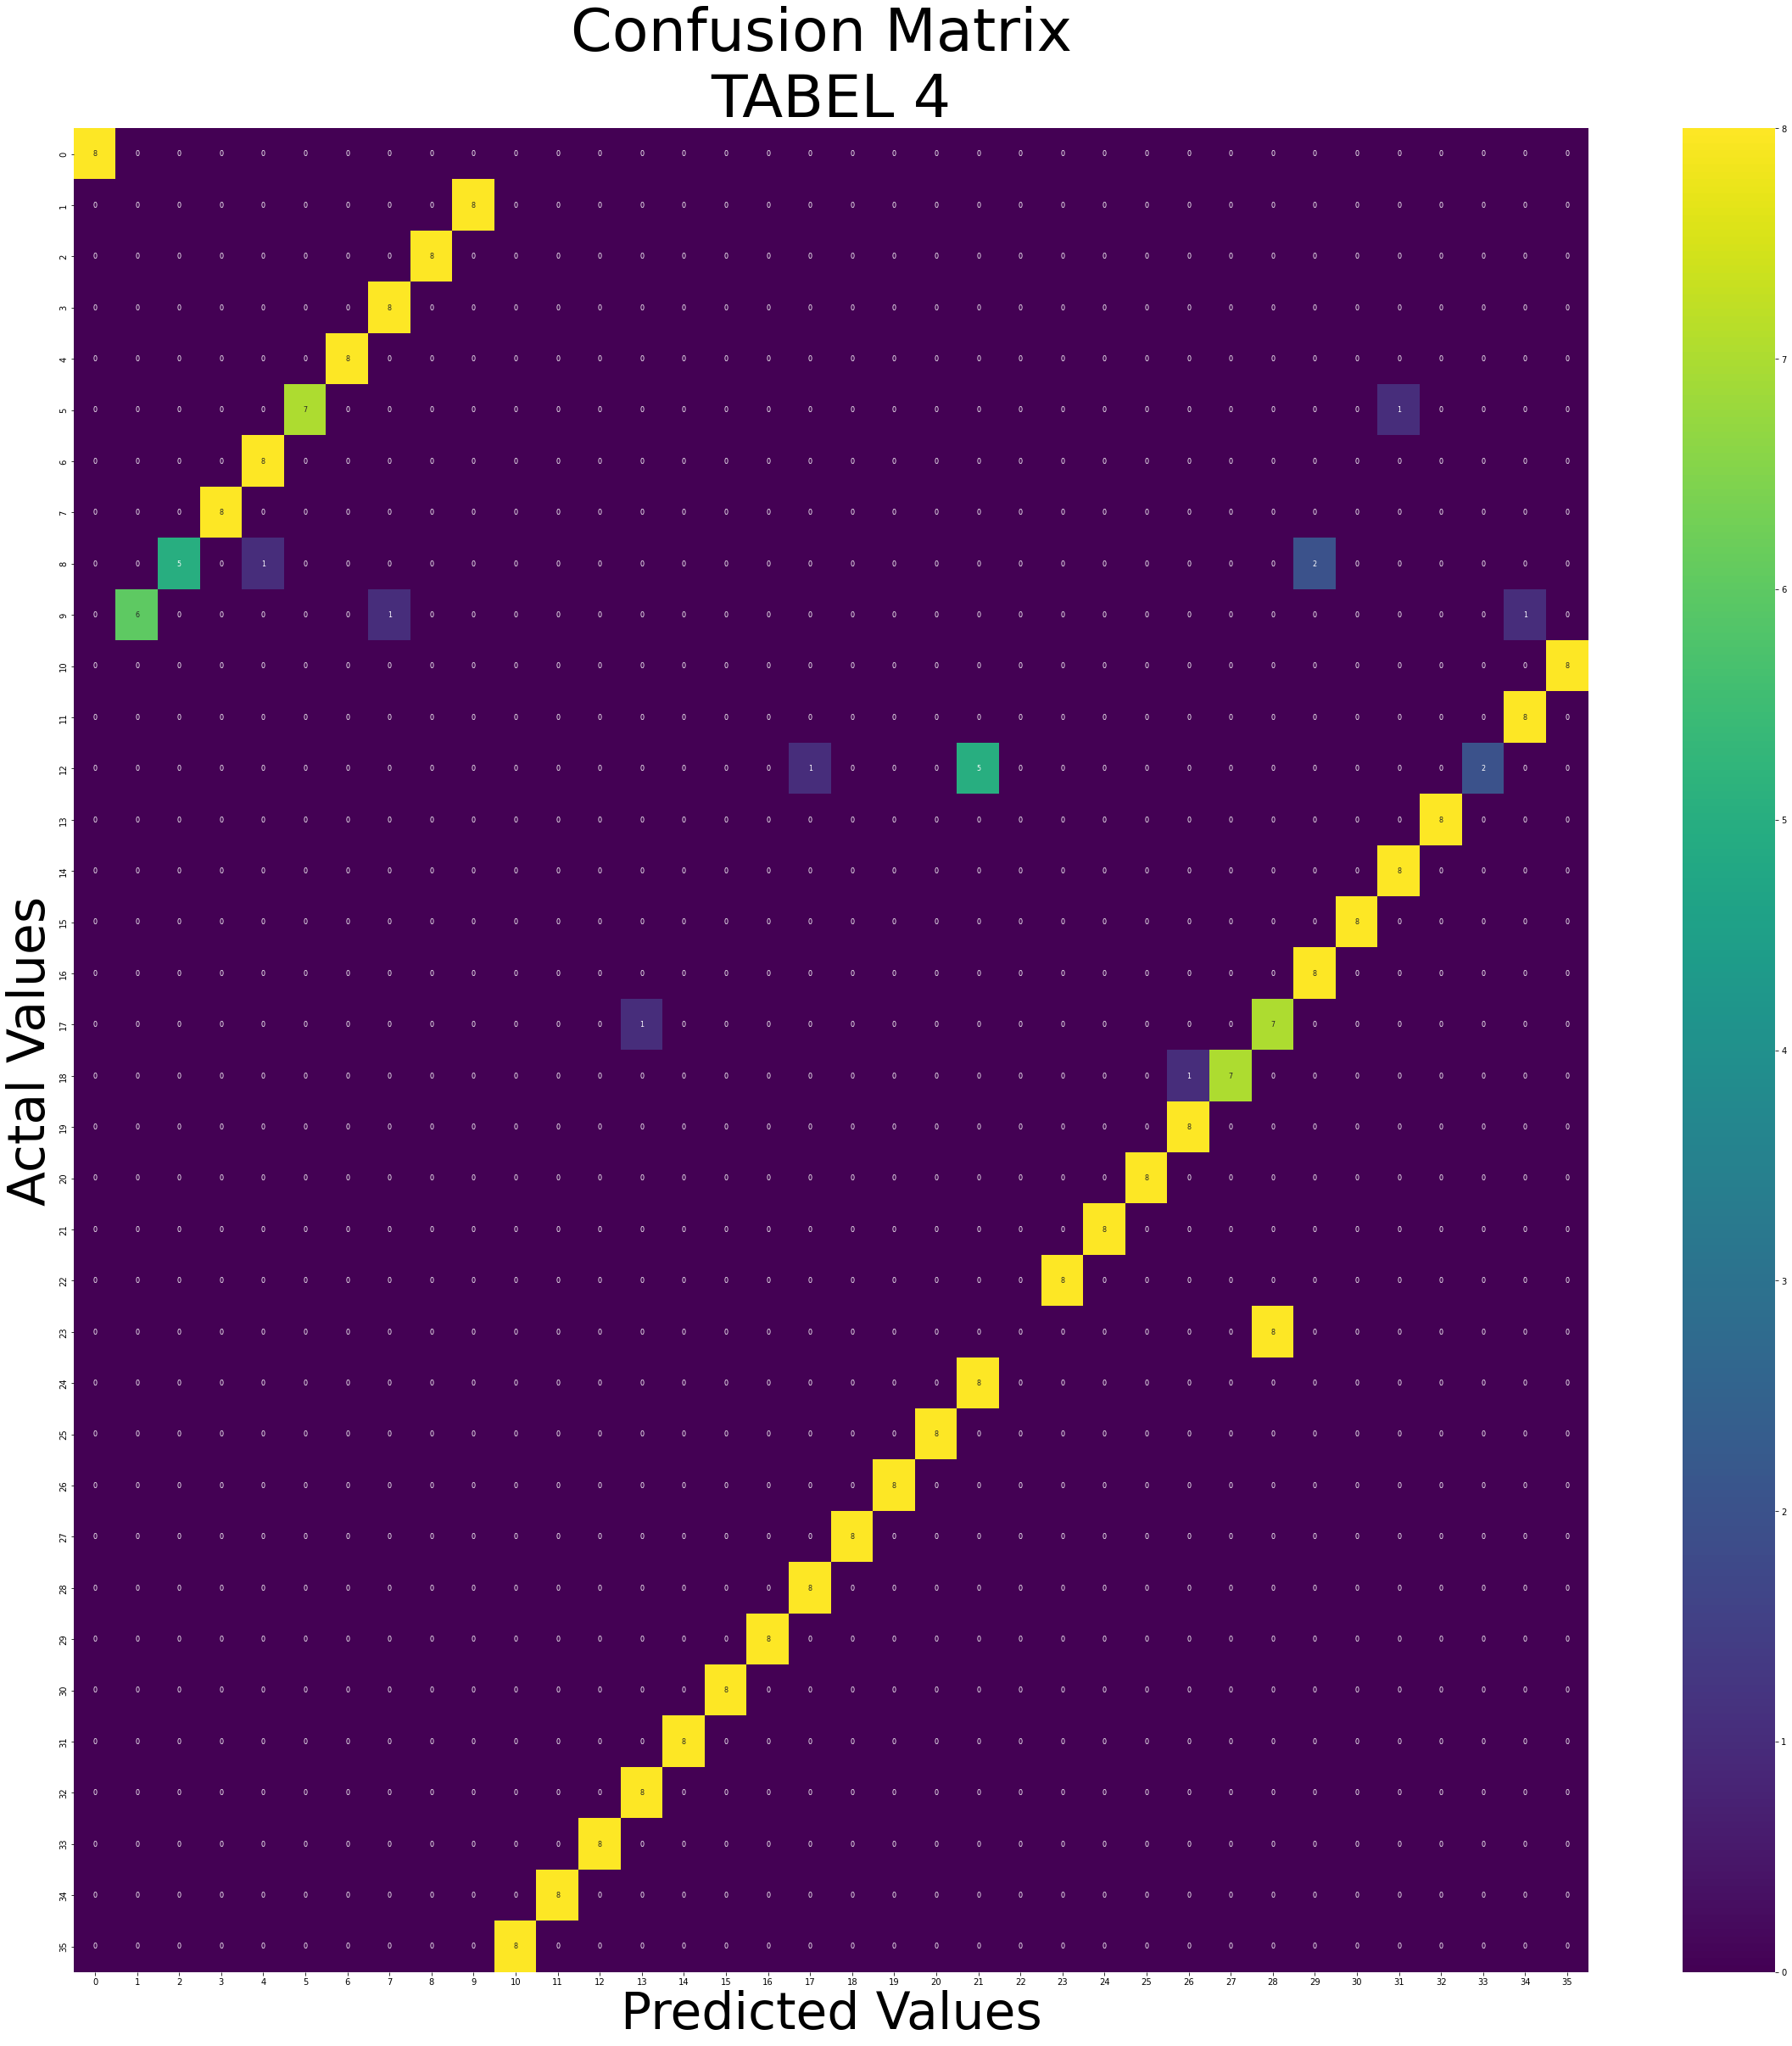

In [43]:
tp4=numTolabel(test_predict_1)
np_array=np.array(y_test)
myConfusionmatrix(np_array,tp4,"\nTABEL 4",color=sns.color_palette("viridis", as_cmap=True))